## Custom Perceptron

In [1]:
import numpy as np

## Perceptron Class

In [2]:
class Perceptron(object):
    """Perceptron classifier.
    --- Parameters
    eta : float [Learning rate (between 0.0 and 1.0)]
    n_iter : int [Passes over the training dataset.]
    random_state : int [Random number generator seed for random weight initialization.]

    --- Attributes
    w_ : 1d-array [Weights after fitting.]
    errors_ : list [Number of misclassifications (updates) in each epoch.]
    """
    def __init__(self, eta = 0.01, n_iter = 50, random_state = 1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, X, Y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc = 0.0, scale = 0.01, size = 1 + X.shape[1])
        self.errors_ = []
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        np.where(self.net_input(X) >= 0.0, 1, -1)


### Iris dataset for testing our perceptron

In [9]:
from sklearn import datasets
import pandas as pd
iris = datasets.load_iris()

In [10]:
import matplotlib.pyplot as plt
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [11]:
df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [18]:
y = df.iloc[0:100, 4].values

In [19]:
X = df.iloc[0:100, [0, 2]].values

### Visualize dataset

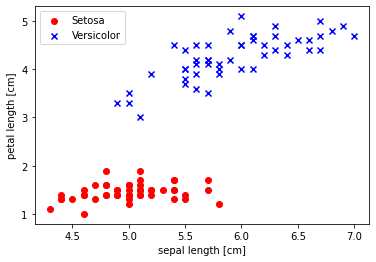

In [20]:
#Plot the data
plt.scatter(X[:50, 0], X[:50, 1], color='r', marker='o', label='Setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='b', marker='x', label='Versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc = 'upper left')
plt.show()

## Train our Perceptron

In [ ]:
ppn = Perceptron(eta = 0.1, n_iter = 10)
ppn.fit(X, y)